# Assessment of wildfire season in California 

In order to explore changes in California’s wildfire season, we will analyze the change over time in the AQI index when PM2.5 is the defining parameter in California counties. We will plot this data from 1980-2020 to visualize any changes that have occurred. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import datetime
import seaborn as sns

In [127]:
# load in complete csv file 
aqi_all = pd.read_csv("data/aqi_df.csv")
#aqi_all=pd.read_csv("data\aqi_df.csv")
# aqi_all

/Users/feliciacruz/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [128]:
# format date as datetime
aqi_all['Date']=pd.to_datetime(aqi_all['Date'], format = '%Y-%m-%d')

# make a year column 
aqi_all['Year'] = pd.DatetimeIndex(aqi_all['Date']).year

# get category column as a factor
#aqi_all["Category"] = aqi_all.Category.astype('category')
#aqi_all.dtypes

aqi_all_dtypes=aqi_all.dtypes
print(aqi_all_dtypes)

Unnamed: 0                            int64
State Name                           object
county Name                          object
State Code                           object
County Code                           int64
Date                         datetime64[ns]
AQI                                   int64
Category                             object
Defining Parameter                   object
Defining Site                        object
Number of Sites Reporting             int64
Year                                  int64
dtype: object


In [10]:
aqi_all["Year"].unique()
#aqi_all

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000,
       1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989,
       1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980])

## Tasks 

- filter for just PM 2.5 days ? (or also PM 10?)
- exploratory plot of all PM days? subset? 
- how to deal with super high AQI values??
- need to make category a factor 

In [129]:
# Filter for AQI in California 

aqi_ca = aqi_all[aqi_all["State Name"] == "California"]

aqi_ca["Year"].unique()
#aqi_ca

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000,
       1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989,
       1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980])

In [62]:
aqi_ca["Defining Parameter"].unique()

array(['PM2.5', 'Ozone', 'PM10', 'CO', 'NO2', 'SO2'], dtype=object)

In [130]:
aqi_ca_pm = aqi_ca[aqi_ca["Defining Parameter"].str.startswith('PM2.5')]
aqi_ca_pm["Year"].unique() 
# --- 1988 is the first year on record for this subset 

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000,
       1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989,
       1988])

(6574.0, 18932.0)

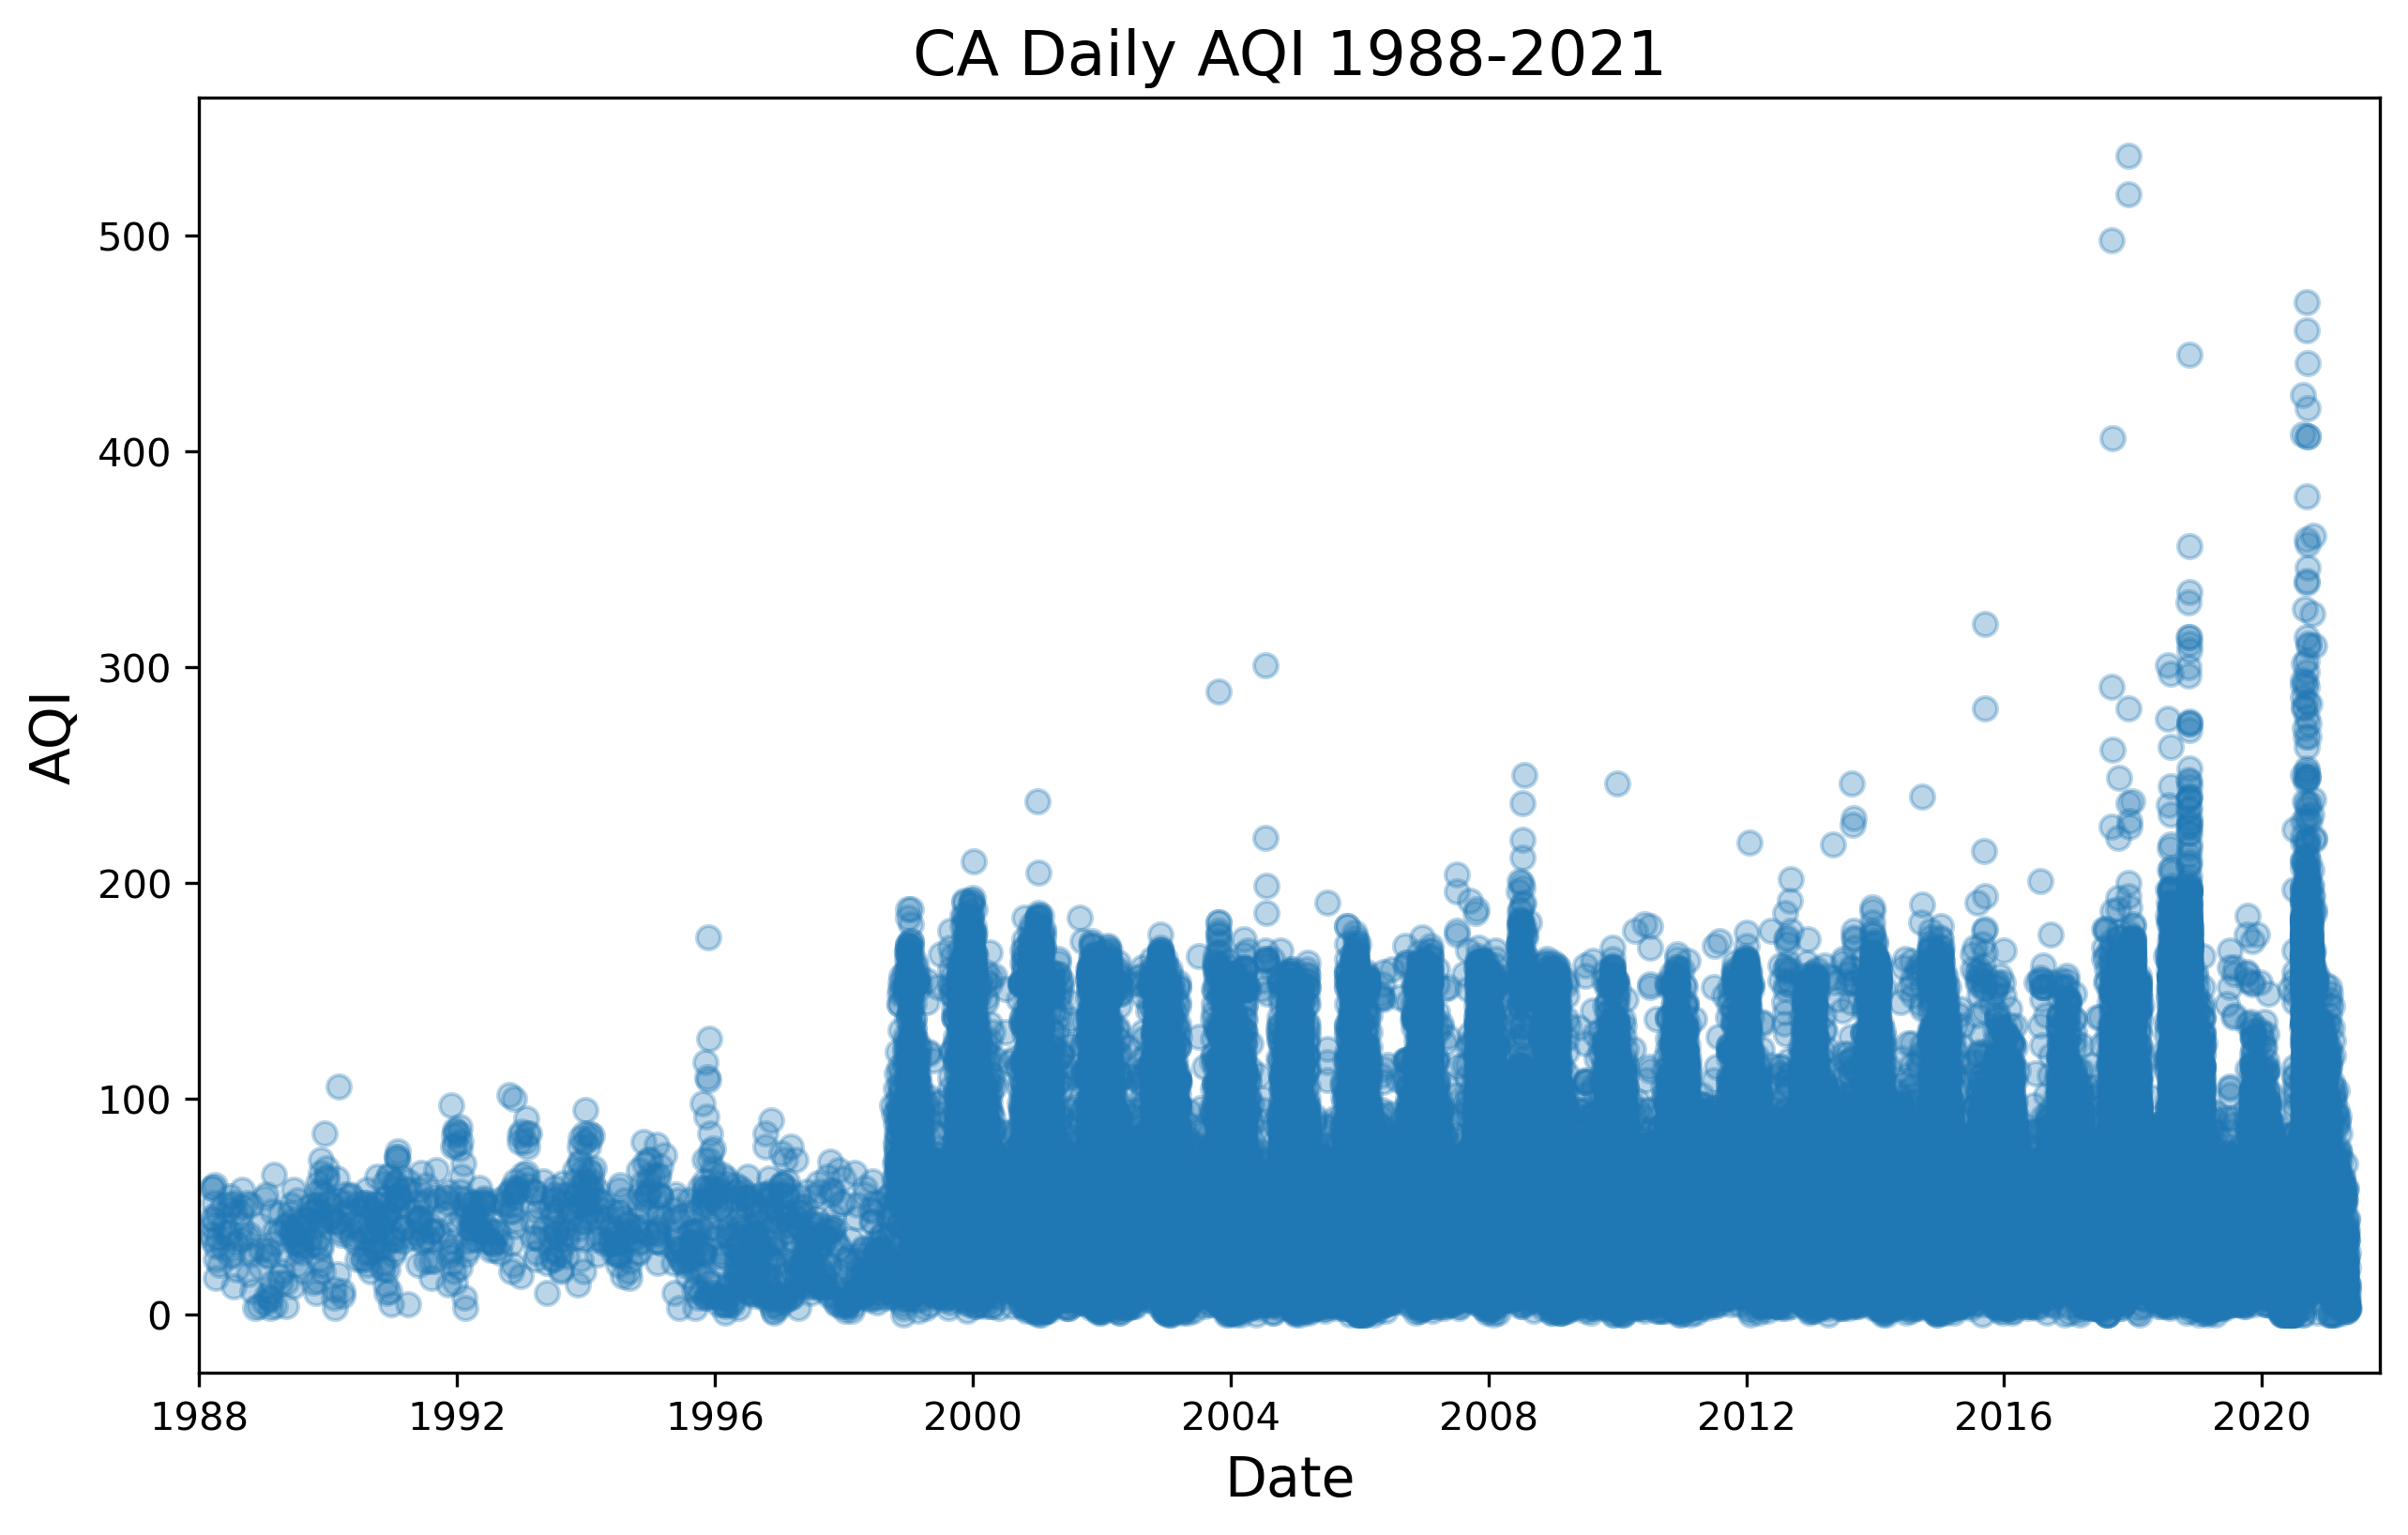

In [154]:
# practice plot

plt.figure(figsize=(10, 6), dpi=300)    # create a new figure, set size and resolution (dpi)
plt.scatter(aqi_ca_pm['Date'], aqi_ca_pm['AQI'], alpha=0.3)  # add data to the plot

#plt.legend(scatterpoints=1, handles='County Code', frameon=False, labelspacing=1, title='County Code')

plt.title('CA Daily AQI 1988-2021', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('AQI', fontsize=14)
plt.xlim([np.datetime64('1988-01-01'), np.datetime64('2021-11-01')])

### group by year and take average of all aqi readings 

In [132]:
# filter for year and aqi columns only 
aqi_year = aqi_ca_pm[["Year", "AQI"]]

# find average AQI for each year and reset index 
year_mean = aqi_year.groupby('Year').mean()
year_mean = year_mean.reset_index()

year_mean

,Year,AQI
0,1988,37.163265
1,1989,36.906977
2,1990,39.518072
3,1991,47.126582
4,1992,47.737500
5,1993,49.843373
6,1994,47.152941
7,1995,44.342593
8,1996,31.337580
9,1997,32.542254


(0.0, 90.0)

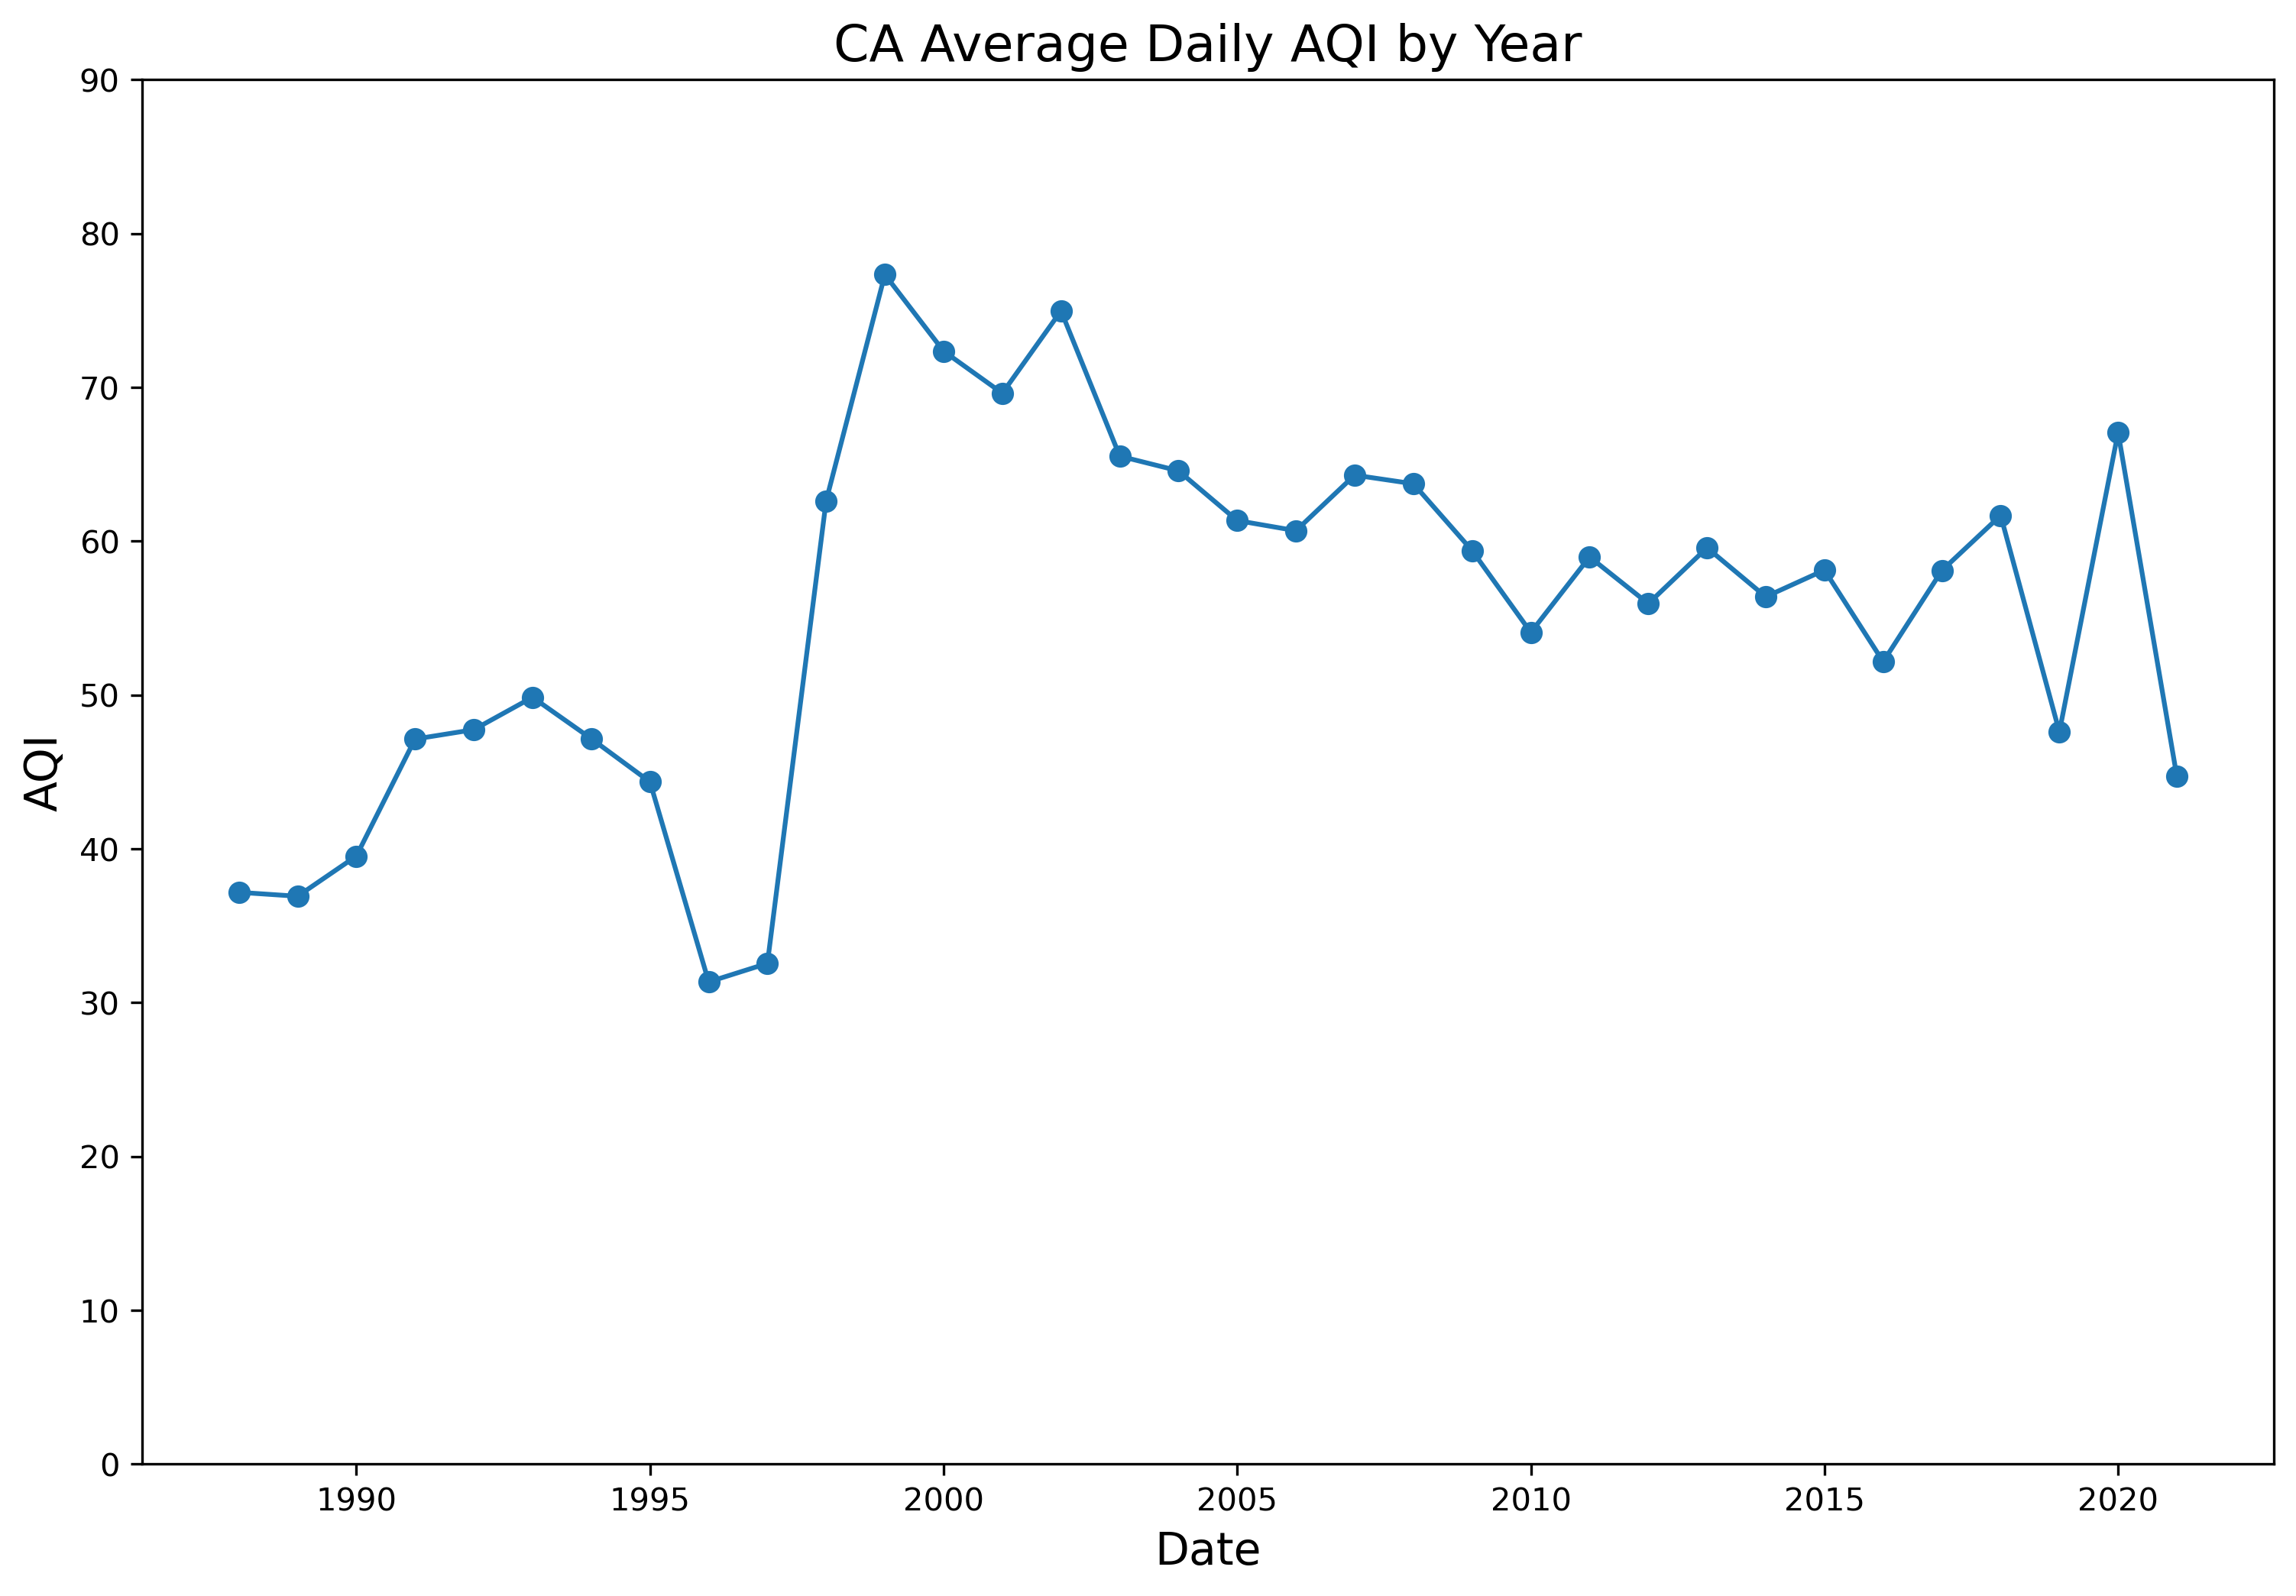

In [133]:
plt.figure(figsize=(12, 8), dpi=300)    # create a new figure, set size and resolution (dpi)
plt.scatter(year_mean['Year'], year_mean['AQI'])  # add point for each year 
plt.plot(year_mean['Year'], year_mean['AQI']) # linegraph to connect the points 

#plt.legend(scatterpoints=1, handles='County Code', frameon=False, labelspacing=1, title='County Code')

plt.title('CA Average Daily AQI by Year', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('AQI', fontsize=14)
plt.ylim(0,90)

- this does not show much 
- higher average aqi around 2000
- could this be due to an inconsistent number of readings per year? 

### counting aqi values above a certain threshhold 

In [134]:
# subset for year, aqi, and category 
ca_sub = aqi_ca_pm[["Date", "Year", "AQI", "Category"]]
ca_sub

,Date,Year,AQI,Category
2019,2021-01-16,2021,10,Good
2020,2021-01-17,2021,0,Good
2021,2021-01-18,2021,0,Good
2022,2021-01-19,2021,7,Good
2023,2021-01-20,2021,32,Good
...,...,...,...,...
9687510,1988-03-12,1988,41,Good
9687678,1988-08-27,1988,47,Good
9687780,1988-12-07,1988,42,Good
9687876,1988-03-12,1988,59,Moderate


In [143]:
# filter for aqi above 150? (unhealthy and above)
ca_unhealthy = ca_sub[ca_sub["AQI"] > 150]
ca_unhealthy["Category"].unique()
ca_unhealthy

,Date,Year,AQI,Category
2354,2021-01-16,2021,152,Unhealthy
54752,2020-08-19,2020,162,Unhealthy
54753,2020-08-20,2020,155,Unhealthy
54756,2020-08-23,2020,174,Unhealthy
54757,2020-08-24,2020,156,Unhealthy
...,...,...,...,...
7175076,1998-12-25,1998,151,Unhealthy
7175082,1998-12-31,1998,158,Unhealthy
7175857,1998-12-25,1998,152,Unhealthy
7175863,1998-12-31,1998,184,Unhealthy


(0.0, 600.0)

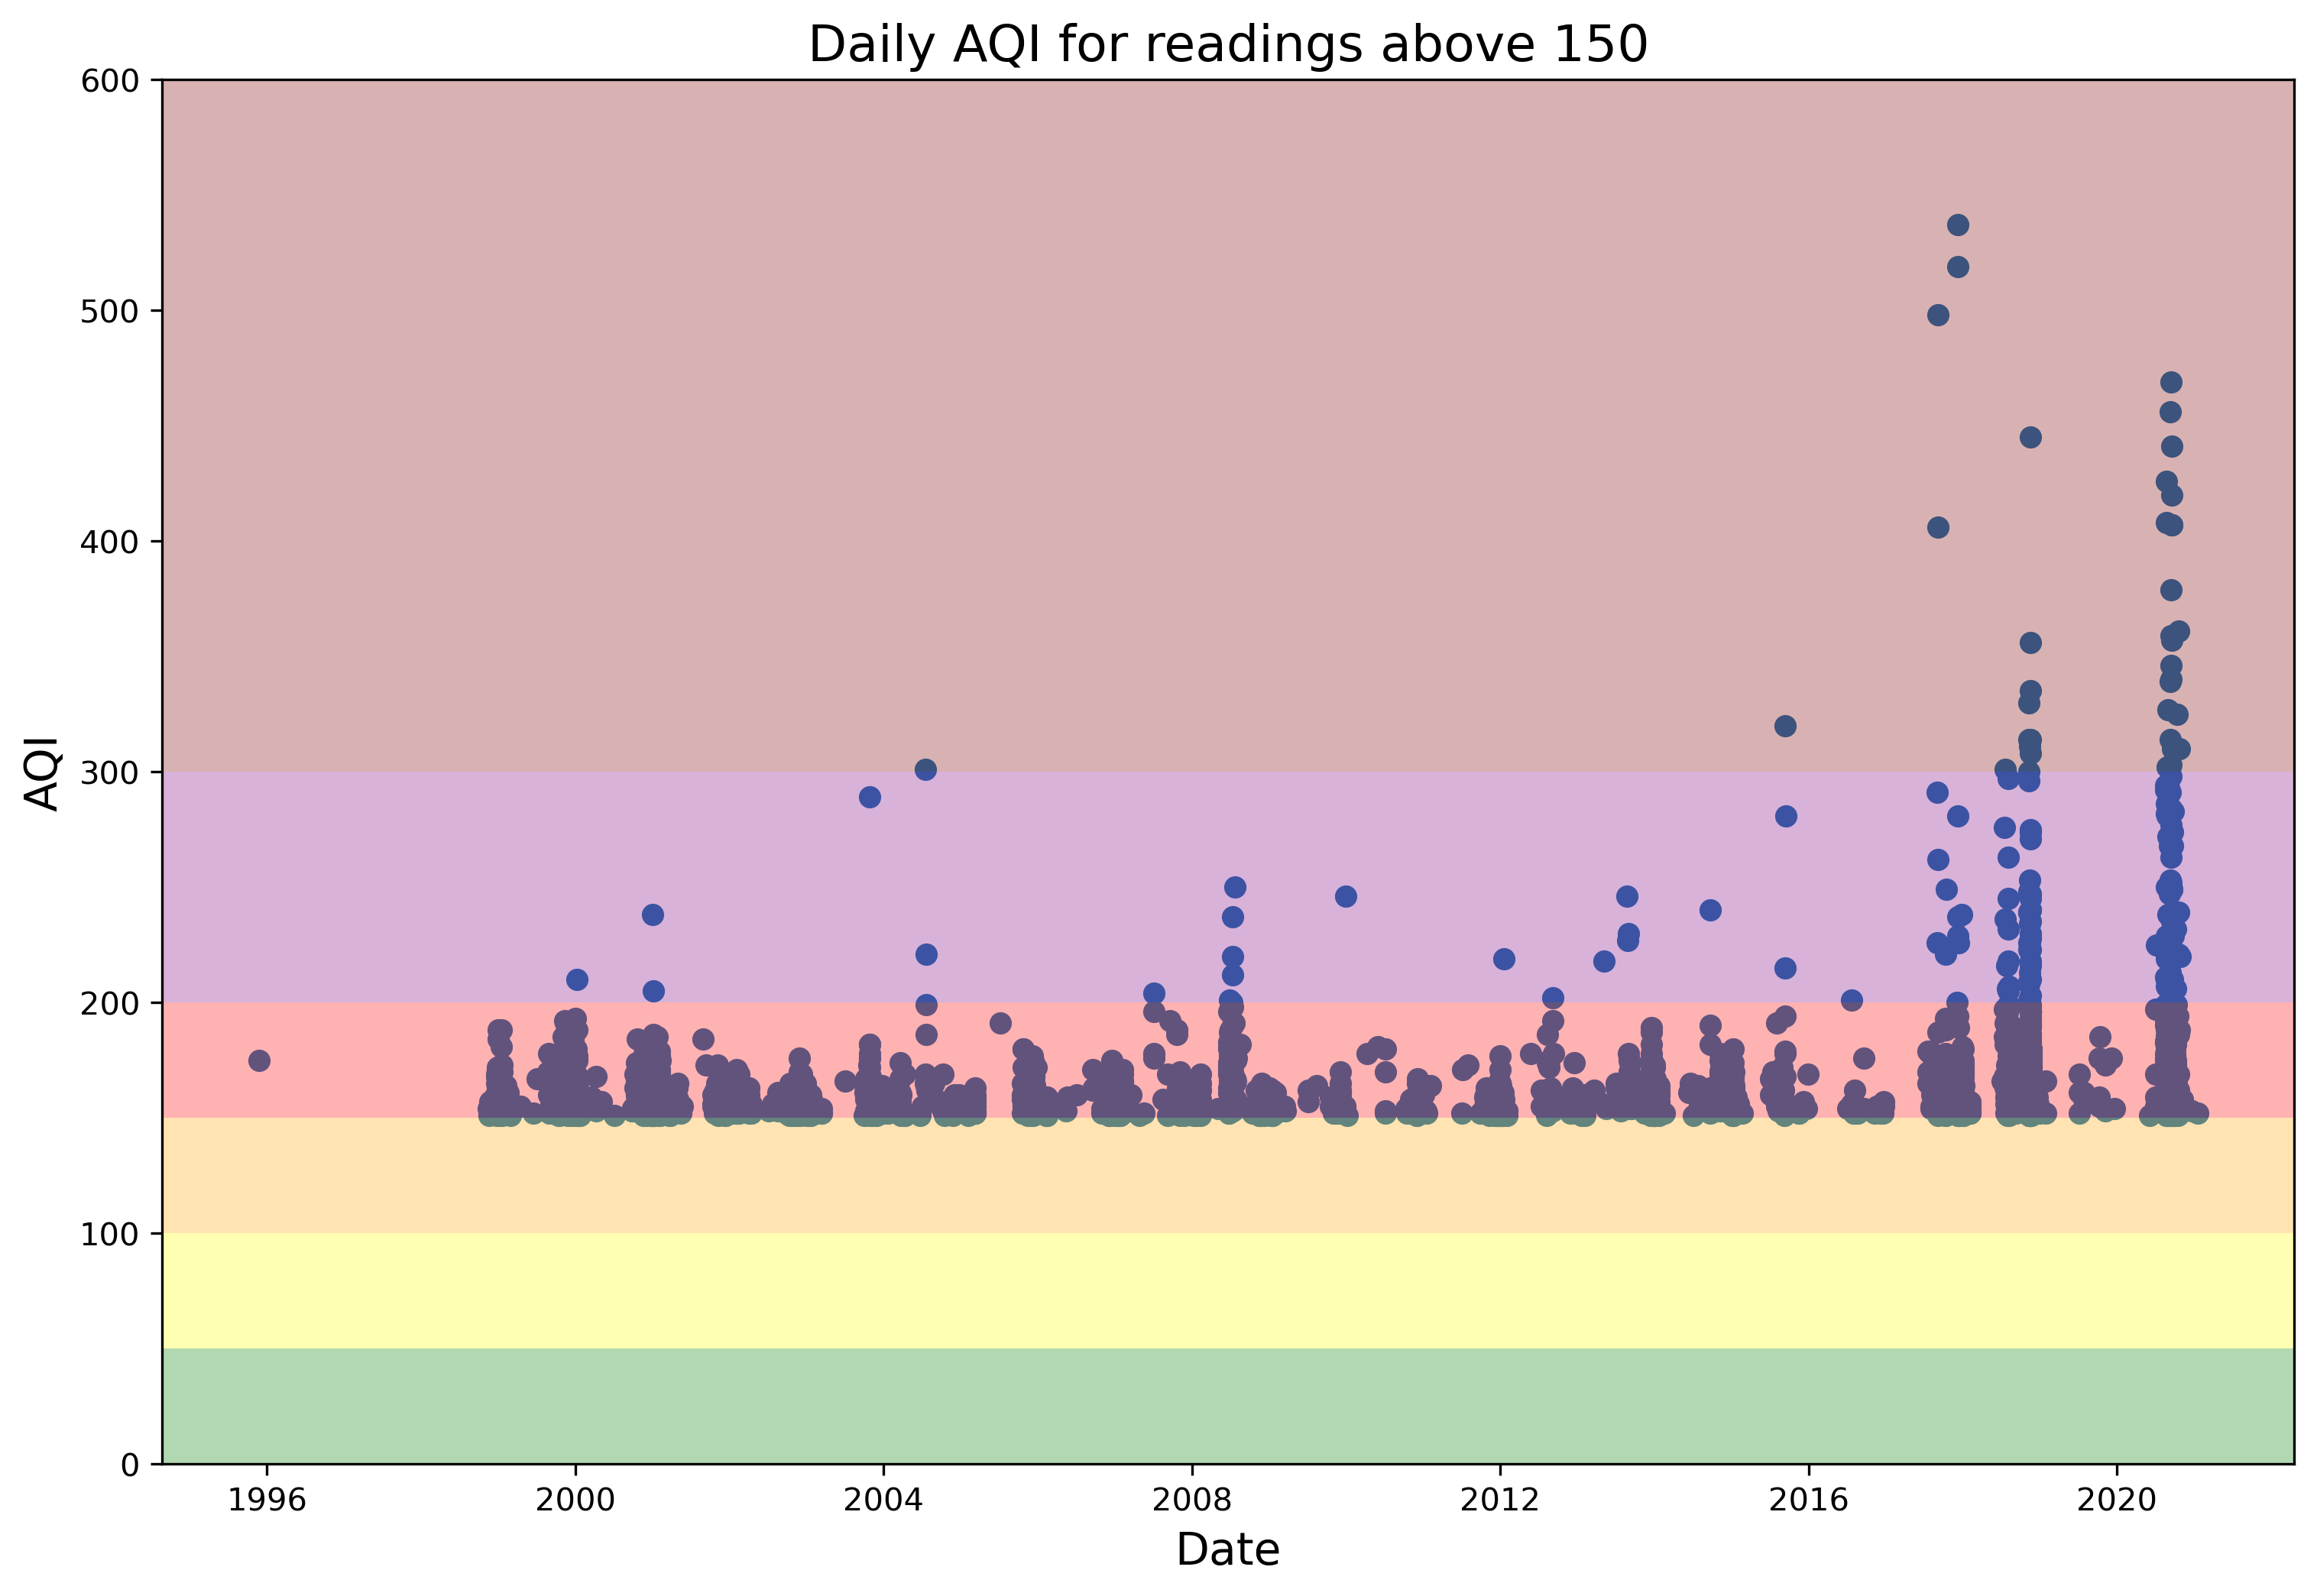

In [163]:
fig, ax = plt.subplots(figsize = (12,8), dpi = 300)

ax.axhspan(0, 50, facecolor='green', alpha=0.3)
ax.axhspan(50, 100, facecolor='yellow', alpha=0.3)
ax.axhspan(100, 150, facecolor='orange', alpha=0.3)
ax.axhspan(150, 200, facecolor='red', alpha=0.3)
ax.axhspan(200, 300, facecolor='purple', alpha=0.3)
ax.axhspan(300, 600, facecolor='maroon', alpha=0.3)

#plt.figure(figsize=(12, 8), dpi=300)    # create a new figure, set size and resolution (dpi)
plt.scatter(ca_unhealthy['Date'], ca_unhealthy['AQI'])  # add data to the plot

plt.title('Daily AQI for readings above 150', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('AQI', fontsize=14)
plt.ylim(0,600)

- Very high AQI readings are getting worse over time, as depicted by more points in purple and maroon regions 

In [137]:
# average for readings above 150 by year 
# filter for year and aqi columns only 
unhealthy_year_aqi = ca_unhealthy[["Year", "AQI"]]

# find average AQI for each year and reset index 
unhealthy_mean = unhealthy_year_aqi.groupby('Year').mean()
unhealthy_mean = unhealthy_mean.reset_index()

unhealthy_mean

,Year,AQI
0,1995,175.000000
1,1998,161.000000
2,1999,162.882075
3,2000,160.907104
4,2001,160.563218
5,2002,157.265000
6,2003,160.227273
7,2004,161.100000
8,2005,159.740000
9,2006,156.112676


Text(0, 0.5, 'AQI')

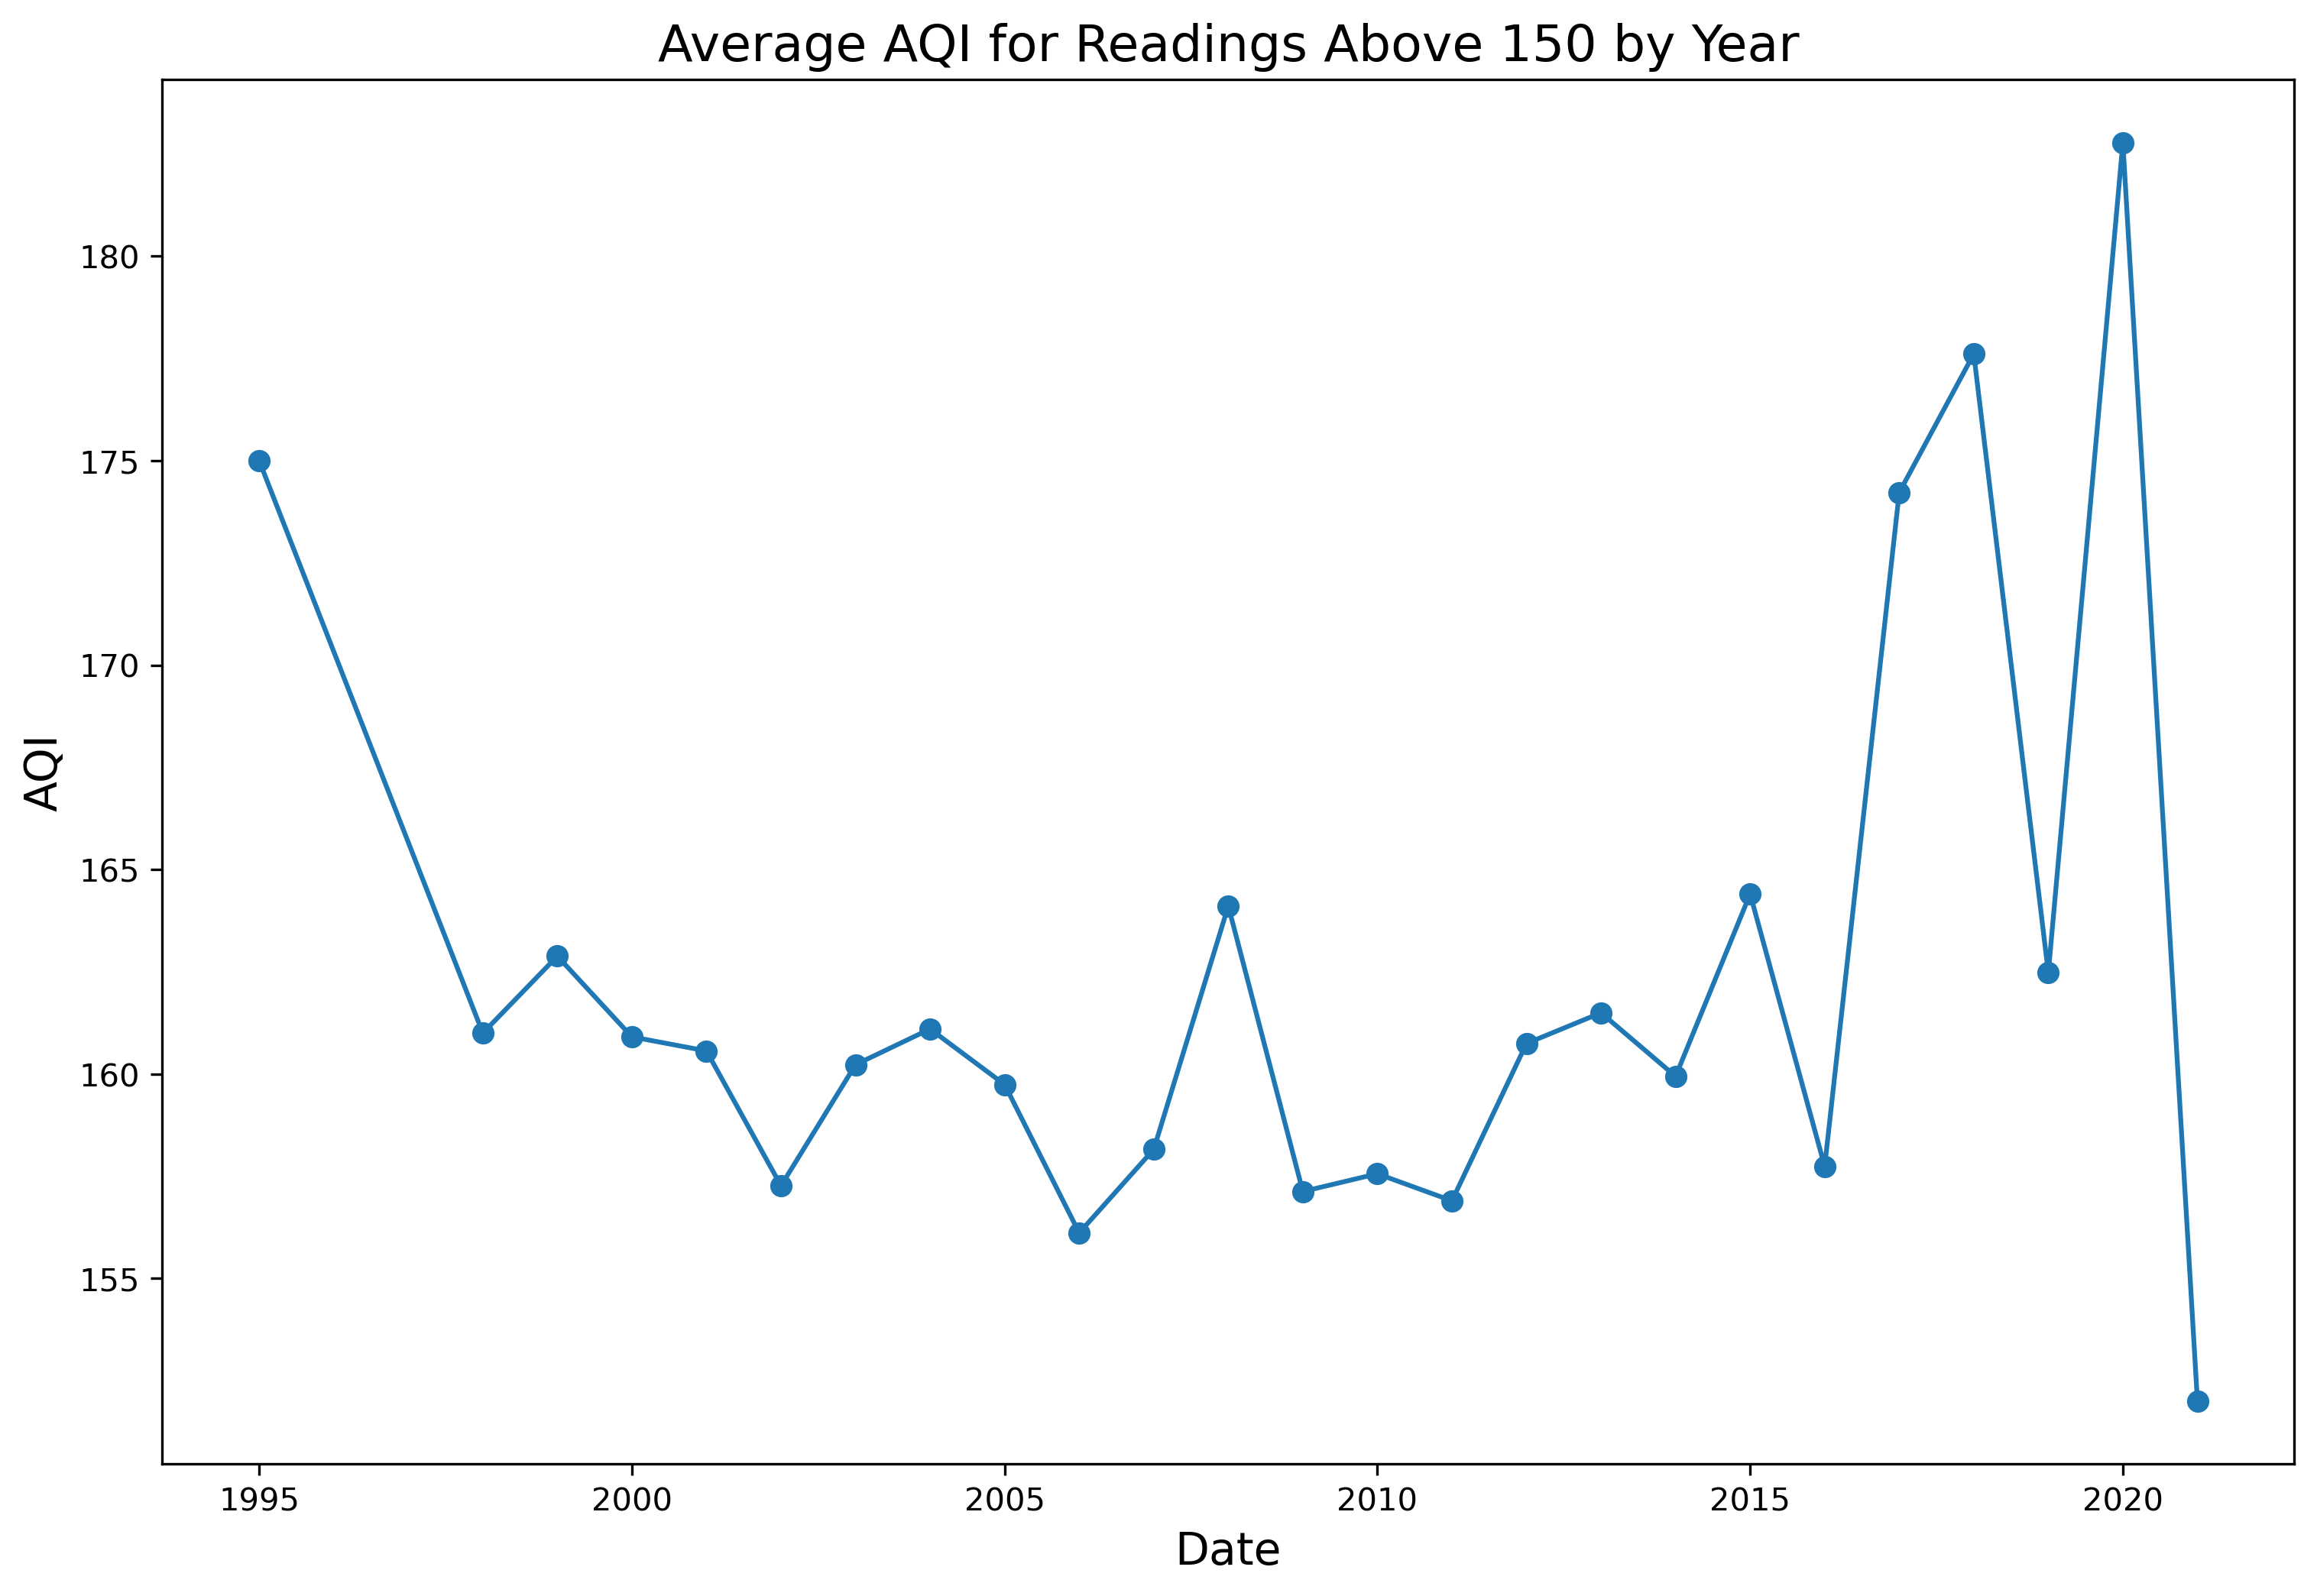

In [138]:
plt.figure(figsize=(12, 8), dpi=300)    # create a new figure, set size and resolution (dpi)
plt.scatter(unhealthy_mean['Year'], unhealthy_mean['AQI'])  # add point for each year 
plt.plot(unhealthy_mean['Year'], unhealthy_mean['AQI']) # linegraph to connect the points 

#plt.legend(scatterpoints=1, handles='County Code', frameon=False, labelspacing=1, title='County Code')

plt.title('Average AQI for Readings Above 150 by Year', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('AQI', fontsize=14)

- recent spikes in 2018 and 2020

In [144]:
# checking 2020 
test_2020 = ca_unhealthy[ca_unhealthy["Year"]==2020]
dates_2020 = test_2020["Date"].unique()
len(dates_2020)
test_2020 # 603 readings in 2020, only 70 unique dates that have AQI > 150

,Date,Year,AQI,Category
54752,2020-08-19,2020,162,Unhealthy
54753,2020-08-20,2020,155,Unhealthy
54756,2020-08-23,2020,174,Unhealthy
54757,2020-08-24,2020,156,Unhealthy
54774,2020-09-10,2020,185,Unhealthy
...,...,...,...,...
73637,2020-09-14,2020,168,Unhealthy
73653,2020-09-30,2020,157,Unhealthy
73654,2020-10-01,2020,165,Unhealthy
73655,2020-10-02,2020,173,Unhealthy


In [140]:
# Count of readings above a threshold per year -- start with aqi_ca_pm df 
ca_unhealthy["Category"].unique()
#ca_unhealthy

ca_unhealthy[["Year", "AQI", "Category"]]

counts = ca_unhealthy.groupby(['Year', 'Category']).count().reset_index()
counts = counts[counts["Category"].isin(["Unhealthy", "Very Unhealthy", "Hazardous"])]
counts["count"] = counts["Date"]
counts = counts[["Year", "Category", "count"]]

[Text(0.5, 1.0, 'Count of Readings above 150')]

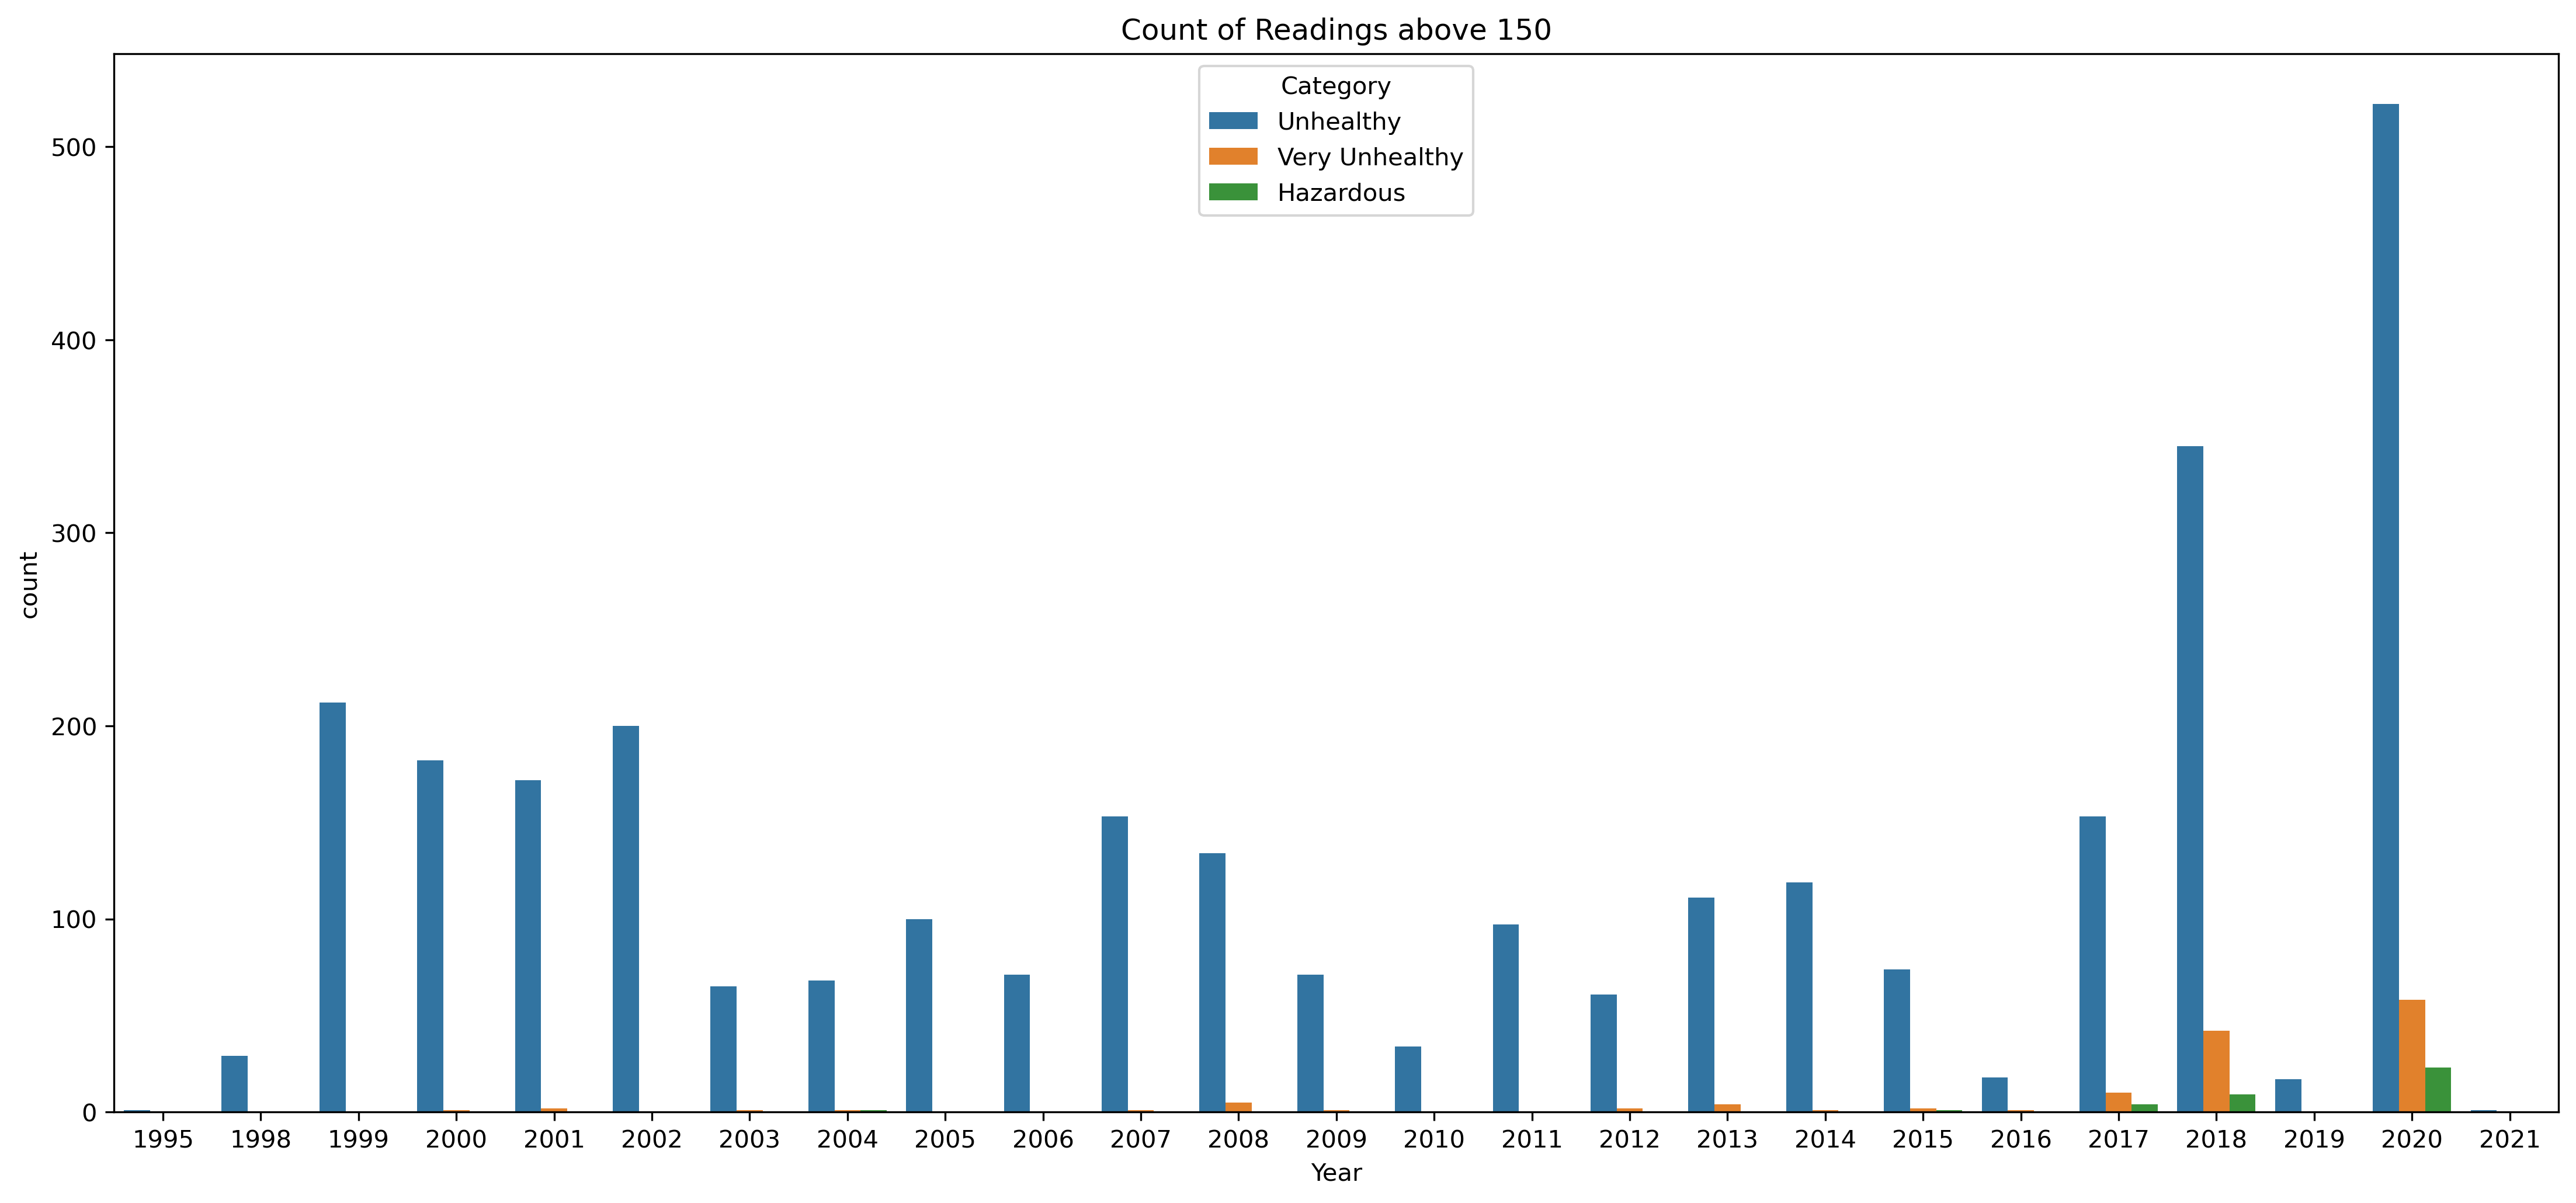

In [169]:
# bar graph of unhealthy (or above) readings  
# Year on x axis, y axis is a count 
# color bar by category

# using seaborn 

plt.figure(figsize=(18, 8), dpi=300) 

sns.barplot(x = 'Year',
            y = 'count',
            hue = 'Category',
            data = counts).set(title='Count of Readings above 150')
# plt.ylim(0,100)

To do:

- threshold > 150 
- average AQI for those readings 
- count of number of days above the threshold
- graph the counts somehow? 
- compare these 
- could add horizontal lines for the various thresholds 